In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
dataset = pd.read_pickle('df_FinalDataset.csv')

In [3]:
dataset.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporas

In [4]:
# Define columns to be removed
remove_these_columns = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'AttendingPhysician',
                        'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
                        'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                        'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                        'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                        'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                        'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
                        'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
                        ]

In [5]:
# Remove unnecessary columns
Train_category_removed = dataset.drop(axis=0, columns=remove_these_columns)

In [6]:
# Define features (X) and target variable (Y)
X_df = Train_category_removed[['InscClaimAmtReimbursed','OPAnnualDeductibleAmt',
                               'IPAnnualDeductibleAmt','IPAnnualReimbursementAmt', 
                               'OPAnnualReimbursementAmt','State', 'County']]

In [7]:
Y_df = Train_category_removed['PotentialFraud']

In [8]:
# Convert 'Yes' and 'No' to 1 and 0
Y_df.replace(['Yes', 'No'], [1, 0], inplace=True)

In [9]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=101)

In [10]:
# Create an XGBClassifier
xgb_classifier = XGBClassifier(random_state=69)

In [11]:
# Define hyperparameters for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [12]:
# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

In [13]:
# Fit the model
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=69, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [14]:
# Get the best parameters
best_params = grid_search.best_params_

In [15]:
# Use the best parameters to create a new model
best_xgb_classifier = XGBClassifier(**best_params, random_state=69)

In [16]:
# Fit the new model
best_xgb_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=69, ...)

In [17]:
# Predict on the test set
y_pred = best_xgb_classifier.predict(X_test)

In [18]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
class_rep = classification_report(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

In [19]:
print("Best Hyperparameters:", best_params)
print("\nAccuracy:", round(accuracy * 100, 2))
print("F1 Score:", round(f1 * 100, 2))
print("\nClassification Report:\n", class_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}

Accuracy: 77.23
F1 Score: 67.49

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.82    103529
           1       0.74      0.62      0.67     63935

    accuracy                           0.77    167464
   macro avg       0.76      0.74      0.75    167464
weighted avg       0.77      0.77      0.77    167464


Confusion Matrix:
 [[89731 13798]
 [24341 39594]]


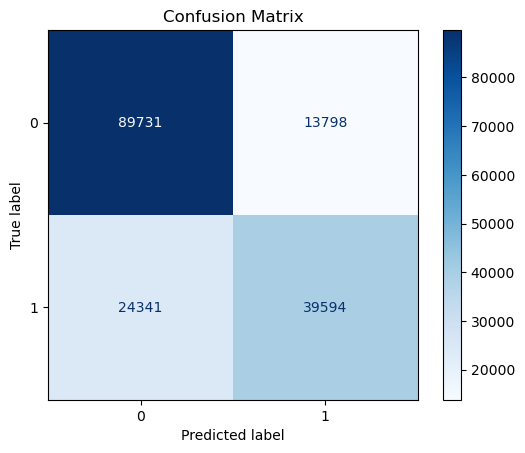

In [20]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_xgb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [21]:
#---Adding Feature Engineering features---

In [22]:
# Convert 'Is_Alive?' to 1 and 0
Train_category_removed['Dead_Alive'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [23]:
# Define features (X) and target variable (Y)
X_df = Train_category_removed[['Claim_Duration','Att_Phy_tot_claims','OPAnnualDeductibleAmt',
                               'IPAnnualDeductibleAmt','IPAnnualReimbursementAmt', 
                               'OPAnnualReimbursementAmt','State', 'County','Dead_Alive']]

In [24]:
Y_df = Train_category_removed['PotentialFraud']

In [25]:
# Convert 'Yes' and 'No' to 1 and 0
Y_df.replace(['Yes', 'No'], [1, 0], inplace=True)

In [26]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=101)

In [27]:
# Create an XGBClassifier
xgb_classifier = XGBClassifier(random_state=69)

In [28]:
# Define hyperparameters for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [29]:
# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

In [30]:
# Fit the model
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=69, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [31]:
# Get the best parameters
best_params = grid_search.best_params_

In [32]:
# Use the best parameters to create a new model
best_xgb_classifier = XGBClassifier(**best_params, random_state=69)

In [33]:
# Fit the new model
best_xgb_classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=69, ...)

In [34]:
# Predict on the test set
y_pred = best_xgb_classifier.predict(X_test)

In [35]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
class_rep = classification_report(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

In [36]:
print("Best Hyperparameters:", best_params)
print("\nAccuracy:", round(accuracy * 100, 2))
print("F1 Score:", round(f1 * 100, 2))
print("\nClassification Report:\n", class_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}

Accuracy: 86.2
F1 Score: 79.34

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90    103529
           1       0.93      0.69      0.79     63935

    accuracy                           0.86    167464
   macro avg       0.88      0.83      0.84    167464
weighted avg       0.87      0.86      0.86    167464


Confusion Matrix:
 [[99981  3548]
 [19562 44373]]


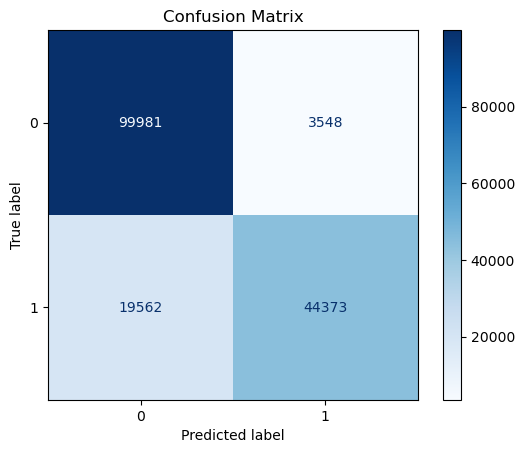

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_xgb_classifier.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.title('Confusion Matrix')
plt.show()